# KHADIM  HUUSASAIN
# 19-CP-71
# LAB 10

1. You have the job of designing an algorithm that will count the number of 
objects with holes and the number of objects without holes in images of the 
kind shown here. Assume that the images are binary with 0 corresponding to black 
and 1 corresponding to white. The imaging system is of low quality and produces 
images that are corrupted with salt and pepper noise. The objects do not overlap 
or touch, but may be close to each other in any direction. They may be of any 
shape or size. The algorithm should not be confused by the salt and pepper 
noise, and should not count noise pixels as objects. 

• Write a pseudo-code description of your algorithm. 

• Write a python code for the implementation of the algorithm.

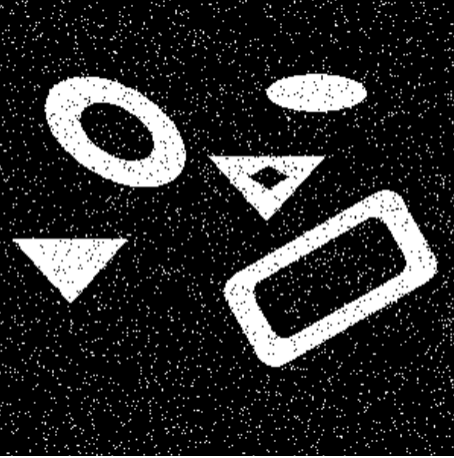

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/khadim.PNG',0)
cv2_imshow(img)

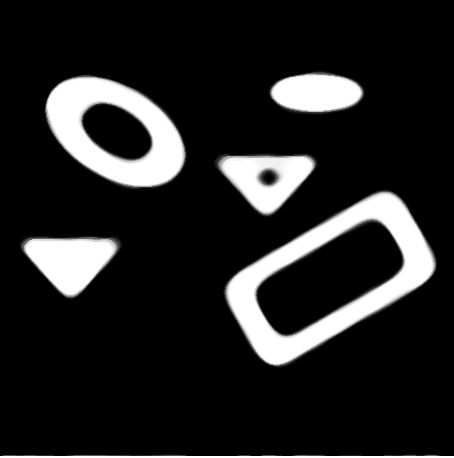

In [3]:
noisy  =img
median_blur= cv2.medianBlur(noisy, 13)
median_blur= cv2.medianBlur(median_blur, 13)
median_blur= cv2.medianBlur(median_blur, 13)
median_blur= cv2.medianBlur(median_blur, 9)
median_blur= cv2.medianBlur(median_blur, 13)
cv2_imshow(median_blur) 


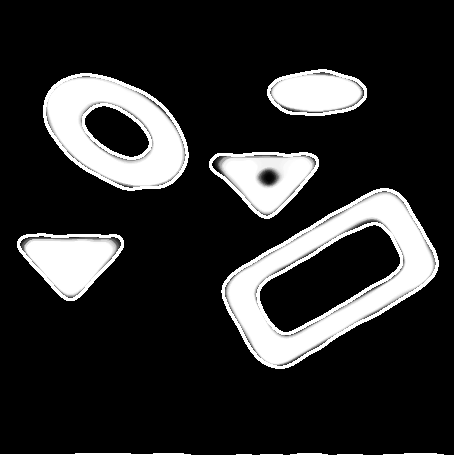

In [4]:
contours, hierarchy = cv2.findContours(median_blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
img2 = cv2.drawContours(median_blur, contours, -1, (255, 0, 255), 2)
cv2_imshow(img2)


2. Write the code for Otsu thresholding without using built-in python 
functions.

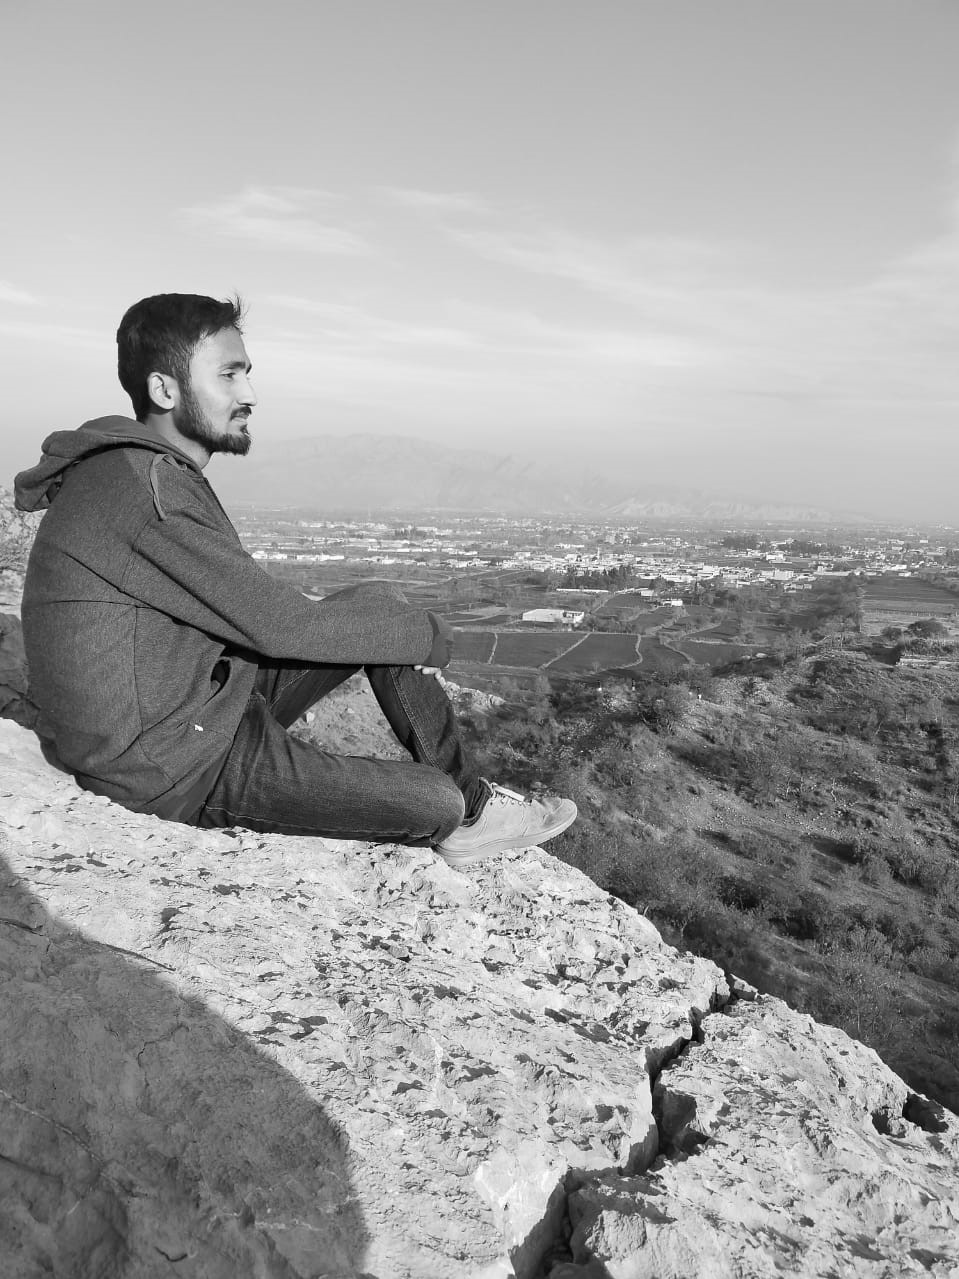

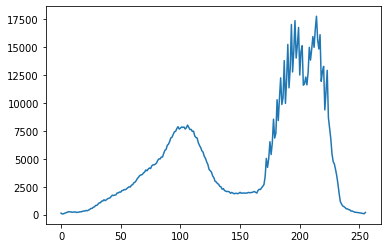

Otsu's algorithm implementation thresholding result:  145.927734375


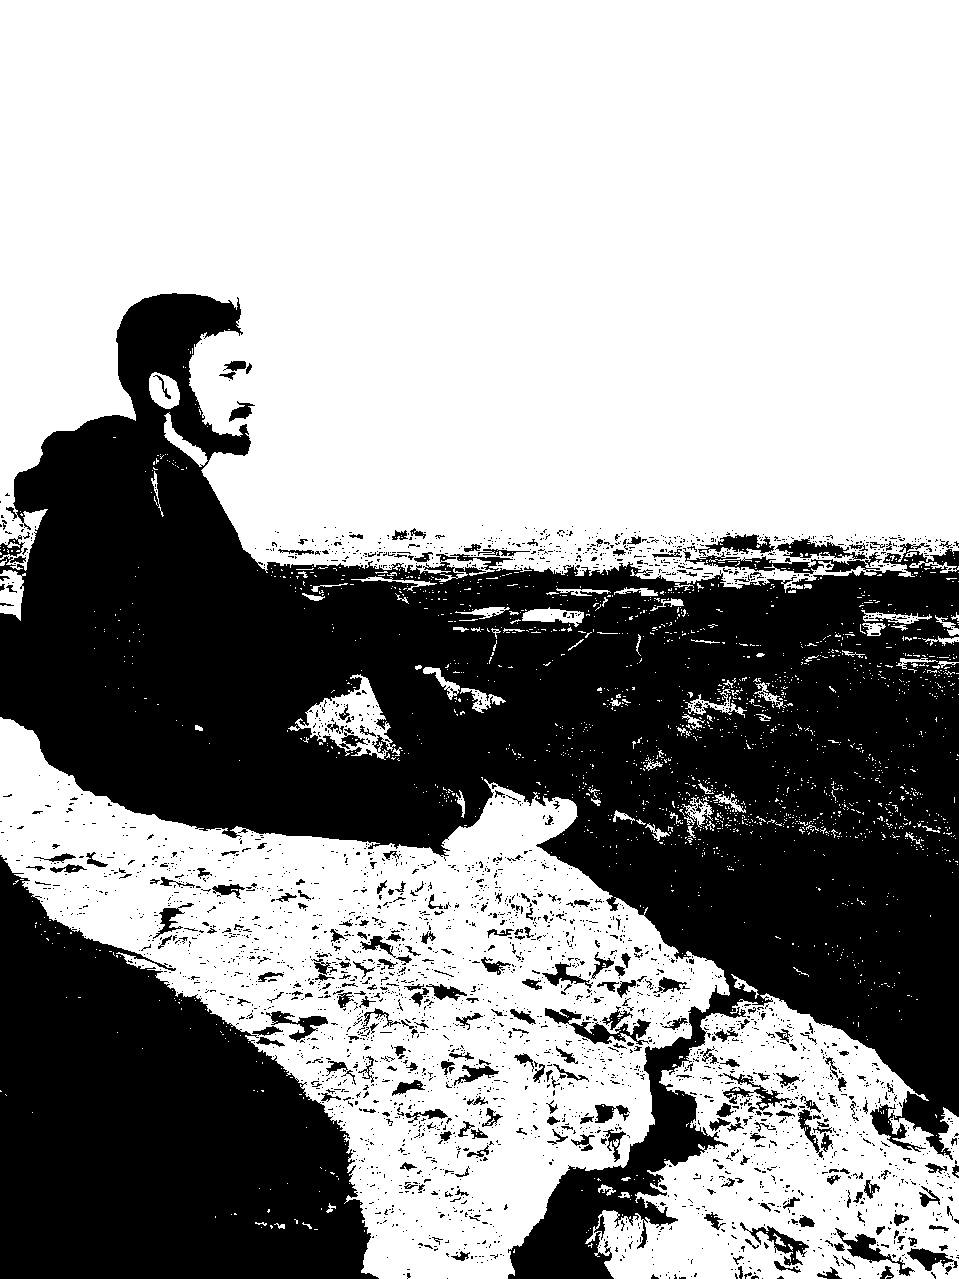

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/khadim hussain/pics/khadim.jpeg',0)
cv2_imshow(img)
# Set total number of bins in the histogram
bins_num = 256

# Get the image histogram
hist, bin_edges = np.histogram(img, bins=bins_num)
# calculate frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
# show the plotting graph of an image
plt.plot(histr)
plt.show()

# Get normalized histogram if it is required
hist = np.divide(hist.ravel(), hist.max())

# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)
(thresh, binary) = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
cv2_imshow(binary)